In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Y = STROKE
<br>
X = gender, age, hypertension, heart_disease, work_type, residence_type, residence_type, avg_glucose_level, bmi, smoking status

## EDA

In [6]:
df.drop(columns= ['id', 'ever_married'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


<AxesSubplot:xlabel='bmi', ylabel='Density'>

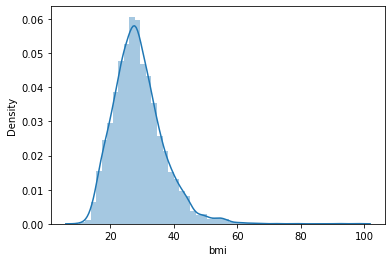

In [9]:
sns.distplot(df['bmi'])

In [11]:
simple_impute = SimpleImputer(strategy='median')
df[['bmi']] = simple_impute.fit_transform(df[['bmi']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [13]:
df.corr()['stroke']

age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.036110
stroke               1.000000
Name: stroke, dtype: float64

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


## preprocess

In [78]:
onehot = OneHotEncoder() 
binary_encoder = ce.BinaryEncoder()

transformer = ColumnTransformer(
    [
    ('one hot', onehot, ['gender']),
    ('binary encoding', binary_encoder, ['work_type', 'Residence_type', 'smoking_status']),
    ],
remainder = 'passthrough')

In [79]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [80]:
df = df.drop(df.index[3116])

In [81]:
df = df.reset_index()

In [82]:
df.drop(columns= 'index', inplace=True)

In [83]:
df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5103,Female,80.0,1,0,Private,Urban,83.75,28.1,never smoked,0
5104,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5105,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5106,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


## Data Splitting

In [84]:
x = df.drop(columns=['stroke'])
y = df['stroke']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

In [86]:
x_train_preprocess = transformer.fit_transform(x_train)
x_test_preprocess = transformer.transform(x_test)

## Logreg

In [87]:
smote = SMOTE()
model = LogisticRegression()

pipe_model = Pipeline([
    ('balance', smote),
    ('clf', model),
])

skf = StratifiedKFold(n_splits = 5) 

model_smote_cv = cross_val_score(pipe_model, x_train_preprocess, y_train, cv = skf, scoring = 'f1')

In [88]:
print(model_smote_cv)
print(model_smote_cv.mean())
print(model_smote_cv.std())

[0.22535211 0.26229508 0.208      0.20979021 0.2260274 ]
0.22629296033875063
0.019514515896870838


## KNN

In [89]:
smote = SMOTE()
model = KNeighborsClassifier(n_neighbors= 5)

pipe_model = Pipeline([
    ('balance', smote),
    ('clf', model),
])

skf = StratifiedKFold(n_splits = 5) 

model_smote_cv = cross_val_score(pipe_model, x_train_preprocess, y_train, cv = skf, scoring = 'f1')

In [90]:
print(model_smote_cv)
print(model_smote_cv.mean())
print(model_smote_cv.std())

[0.21917808 0.22222222 0.22797927 0.15384615 0.20960699]
0.20656654395422383
0.02702347135138679


## tree

In [91]:
smote = SMOTE()
model = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

pipe_model = Pipeline([
    ('balance', smote),
    ('clf', model),
])

skf = StratifiedKFold(n_splits = 5) 

model_smote_cv = cross_val_score(pipe_model, x_train_preprocess, y_train, cv = skf, scoring = 'f1')

In [92]:
print(model_smote_cv)
print(model_smote_cv.mean())
print(model_smote_cv.std())

[0.20080321 0.19246862 0.14634146 0.15272727 0.18181818]
0.17483175001167126
0.021608751070988547


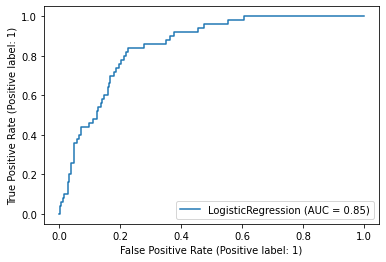

In [93]:
logreg = LogisticRegression()
logreg.fit(x_train_preprocess, y_train)
plot_roc_curve(logreg, x_test_preprocess, y_test)

## HYPERPARAM

In [106]:
hyperparam_c = {
    'model__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    'model__max_iter':[100,200,300,400,500,1000]
}

smote = SMOTE()

skfold = StratifiedKFold(n_splits = 5) 
logreg = LogisticRegression()

estimator = Pipeline([
    ('balance', smote),
    ('model', logreg)
])

grid_search = GridSearchCV(
    estimator,
    param_grid = hyperparam_c,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1
)

In [107]:
y.value_counts()

0    4859
1     249
Name: stroke, dtype: int64

In [108]:
grid_search.fit(x_train_preprocess, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balance', SMOTE()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1,
                                      0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001,
                                      5e-05],
                         'model__max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [109]:
grid_search.best_params_

{'model__C': 5, 'model__max_iter': 300}

In [110]:
grid_search.best_score_

0.23298303048495192

In [111]:
hasil_cv = pd.DataFrame(grid_search.cv_results_)
hasil_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.375711,0.023664,0.004787,0.001163,1000,100,"{'model__C': 1000, 'model__max_iter': 100}",0.227586,0.258333,0.212245,0.216028,0.226027,0.228044,0.016222,40
1,0.508283,0.030775,0.008082,0.004724,1000,200,"{'model__C': 1000, 'model__max_iter': 200}",0.225352,0.261224,0.213115,0.216783,0.221477,0.227590,0.017320,43
2,0.791766,0.069414,0.009375,0.005735,1000,300,"{'model__C': 1000, 'model__max_iter': 300}",0.230769,0.264463,0.213992,0.219858,0.229965,0.231809,0.017499,5
3,1.197710,0.122134,0.007382,0.004747,1000,400,"{'model__C': 1000, 'model__max_iter': 400}",0.228374,0.263374,0.213992,0.212766,0.226804,0.229062,0.018306,29
4,1.467118,0.023769,0.004690,0.001245,1000,500,"{'model__C': 1000, 'model__max_iter': 500}",0.227586,0.262295,0.213115,0.213523,0.228374,0.228979,0.017904,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.157986,0.021125,0.006412,0.000821,0.00005,200,"{'model__C': 5e-05, 'model__max_iter': 200}",0.234114,0.249027,0.209738,0.193103,0.220065,0.221209,0.019304,90
92,0.163278,0.023892,0.006386,0.002243,0.00005,300,"{'model__C': 5e-05, 'model__max_iter': 300}",0.242424,0.250000,0.208955,0.198582,0.219355,0.223863,0.019542,69
93,0.150310,0.025039,0.010793,0.005023,0.00005,400,"{'model__C': 5e-05, 'model__max_iter': 400}",0.235690,0.248062,0.208178,0.202091,0.221498,0.223104,0.017019,75
94,0.147497,0.017265,0.004089,0.001011,0.00005,500,"{'model__C': 5e-05, 'model__max_iter': 500}",0.241611,0.250980,0.208178,0.199313,0.217949,0.223606,0.019666,71
